# Multiple Testing, P-Hacking, Reproducibility Crisis, Publication Bias 

### Background reading:
*Intro to Statistical Learning*: Chapter 13 and Chapter 11 Section 5.4

*Ethical Algorithm*: Chapter 4

## Multiple Testing
### Dataset:
(include link to data source)

Attribute columns:
1. 



### Example Code

# dataset description
A network was built using only gene expression with 272 breast cancer patients (as rows), and 1570 columns.

Metadata includes patient info, treatment, and survival.

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
import yellowbrick as yb

In [8]:
# load in dataset
data_raw = pd.read_csv("gene and breast cancer.csv")

In [9]:
# subset data (without uninterpretable features)
features_to_drop = data_raw.columns[16:]
data_subset = data_raw.drop(features_to_drop, axis=1)

In [14]:
# data splitting
X = data_subset.drop(['Patient', 'ID'], axis=1)
y = data_subset['eventdeath']

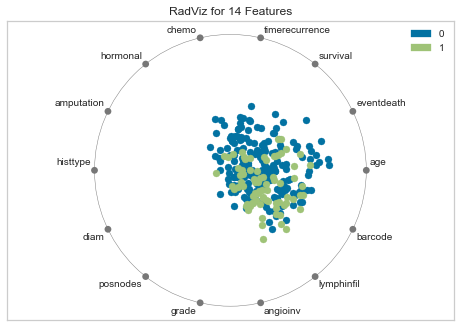

<AxesSubplot:title={'center':'RadViz for 14 Features'}>

In [15]:
# visualise class separation
from yellowbrick.features.rankd import Rank2D 
from yellowbrick.features.radviz import RadViz 
from yellowbrick.features.pcoords import ParallelCoordinates 

classes = ['alive', 'dead']
features = X.columns
visualizer = RadViz(clases=classes, features=features)

X_matrix = X.values
y_matrix = y.values

visualizer.fit(X_matrix, y_matrix)
visualizer.transform(X_matrix)
visualizer.poof()

In [13]:
import numpy as np
from scipy import stats

def get_p_value(arrA, arrB):
    a = np.array(arrA)
    b = np.array(arrB)
    t, p = stats.ttest_ind(a,b)
    return p

In [30]:
data_subset = data_raw.drop(data_raw.columns[0:3], axis=1)
data = data_subset.drop(data_subset.columns[1:13], axis=1)

In [32]:
group1 = data[data['eventdeath']==0]
group2 = data[data['eventdeath']==1]

## P-Hacking
INSERT INFORMATION HERE 

## Reproducibility Crisis

The reproducibility crisis is a phenomenon discovered in recent years, where the results of many reputable scientific studies using widely accepted experimental methods are difficult or even impossible to reproduce. This calls into question the credibility of those studies, because if the results cannot be replicated, the study's findings may be based on random chance and not a true cause-and-effect relationship. 

See the following brief article from the American Psychological Association: https://www.apa.org/monitor/2015/10/share-reproducibility

The explanantion behind this crisis is that it is mostly due to publication bias and low-power studies. Publication bias will be explained in more detail below. 

The term "low-power studies" refers to the statistical power of the hypothesis test. Statistical power is the probability that a hypothesis test correctly rejects a false null hypothesis. It is inversely related to the probabiltiy of a type II error (Power = 1 – β). The power of the test depends on three factors, *effect size* (difference between two or more treatments), *sample size*, and *variability* of the sample. The larger the effect size and sample size, and the smaller the variability, the less likely it is that the results of the study are due to random chance. 

Low-power studies have a high risk of a type II error, that is, a high chance of incorrectly failing to reject the null when it actually is false. That means that extreme values are required in order to trigger a statistically significant finding in the study. So, when a statistically significant finding *is* made, it may appear to have a bigger effect size than the true difference between the groups. A statistical power of 0.8 is seen as a good target value in order to eliminate this bias. For more information about the downsides of low-power hypothesis tests, see this explanation: https://statisticsbyjim.com/hypothesis-testing/low-power-studies/

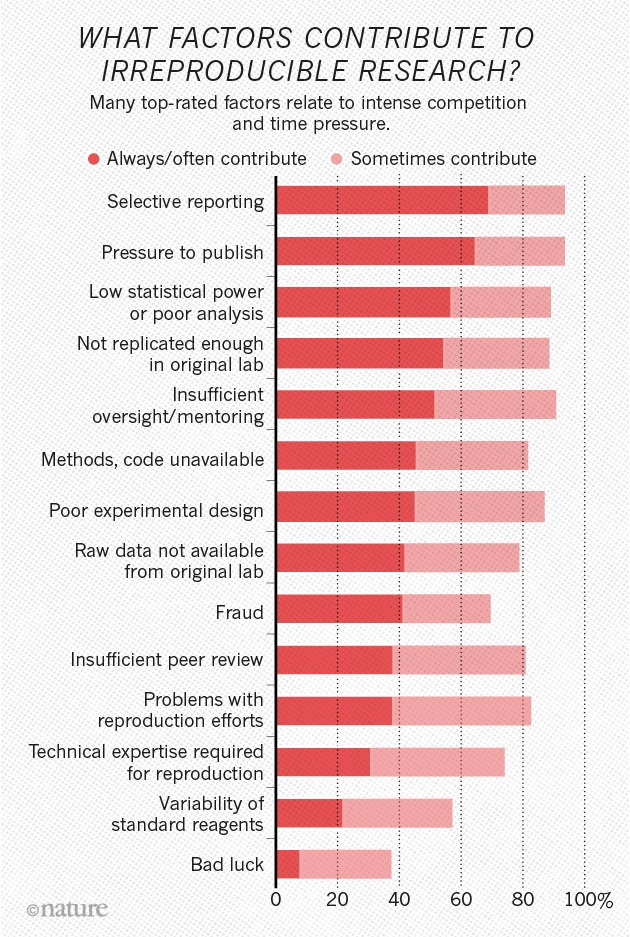

## Publication Bias

Publication bias is essentially the scientific version of "if it bleeds, it leads"--a saying in journalism which means sensational, violent stories are prioritized in the news, because they draw viewers' attention. Scientific journals are interested in publishing groundbreaking research and new discoveries, which affects the research papers they choose to accept. 

The biggest factors contributing to publication bias are as follows, according to an article from the NIH: 

    1. Rejection by journal editors and reviewers
    
    2. Lack of interest to revise the research paper
    
    3. Competing interests
    
    4. Lack of motivation to write a reseach paper
    
Many scientists will consider research with negative or neutral results a failure, which is not the case. As long as the methodology was sound, the findings are meaningful even if it is not the outcome that the reseacher was hoping for.

The two plots below show the results available from dozens of experiments designed to determine the size of a given effect. The upper plot represents the true distribution of findings around a mean effect size. The lower plot represents all findings present in literature, after publication bias has taken effect. It is clear that in this example, the studies with more negative effects were not published in journals. Therefore, if one were an outsider making assumptions solely off of published research, they would likely conclude that the effect is greater than it truly is.

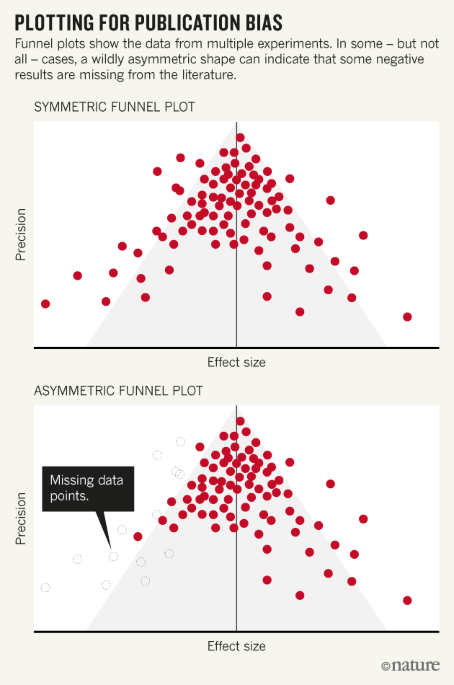

### Other References
Reproducibility Crisis Infographic: http://www.biobserve.com/behavioralresearch/reproducibility-in-behavioral-neuroscience-methods-matter/

Publication Bias Inforgraphic: https://www.nature.com/articles/nature.2017.21728

Causes of Publication Bias Article: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6573059/#:~:text=Publication%20bias%20is%20defined%20as,strength%20of%20the%20study%20findings.